In [ ]:
pip install matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\reaga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------ --------------- 5.0/8.0 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 26.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 30.3 MB/s eta 0:00:00


In [33]:
%pip install faker



   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------------------- - 1.8/1.9 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 13.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\reaga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Data Preprocessing


## Load Dataset


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../dataset/dataset.csv')

# Inspect the dataset
print(df.head())



   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


## Text Cleaning


In [2]:

# Lowercase the 'text' column
df['category'] = df['category'].str.lower()
df['instruction'] = df['instruction'].str.lower()
# Lowercase all column names
df.columns = df.columns.str.lower()


print(df.head())


   flags                                        instruction category  \
0      B   question about cancelling order {{order number}}    order   
1    BQZ  i have a question about cancelling oorder {{or...    order   
2   BLQZ    i need help cancelling puchase {{order number}}    order   
3     BL         i need to cancel purchase {{order number}}    order   
4  BCELN  i cannot afford this order, cancel purchase {{...    order   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [52]:
# Count total duplicate occurrences (excluding the first occurrence)
total_duplicates = df.duplicated(subset=["instruction"]).sum()

# Remove duplicates but keep the first occurrence
df = df.drop_duplicates(subset=["instruction"], keep="first")

# Total rows after removing duplicates
total_rows_after = len(df)

# Save the cleaned data to a new CSV file
df.to_csv("cleaned_file.csv", index=False)

# Print results
print(f"Total Rows Before Removing Duplicates: {total_duplicates}")
print(f"Total Duplicate Occurrences Removed: {total_duplicates}")
print(f"Total Rows After Removing Duplicates: {total_rows_after}")
print("Cleaned file saved as 'cleaned_file.csv'.")


Total Rows Before Removing Duplicates: 2501
Total Duplicate Occurrences Removed: 2501
Total Rows After Removing Duplicates: 24371
Cleaned file saved as 'cleaned_file.csv'.


## NER


In [3]:
import pandas as pd
import re
from collections import Counter


# Detect rows with placeholders
df['has_placeholder'] = df['instruction'].str.contains(r'\{\{.*?\}\}')

# Count rows with placeholders
rows_with_placeholders = df['has_placeholder'].sum()

# Extract placeholders function
def extract_placeholders(text):
    return re.findall(r'\{\{(.*?)\}\}', text)

# Apply function and get all placeholders
placeholders = df[df['has_placeholder']]['instruction'].apply(extract_placeholders).explode()

# Count occurrences of each placeholder
placeholder_counts = Counter(placeholders)

# Convert to DataFrame
placeholder_df = pd.DataFrame.from_dict(placeholder_counts, orient='index', columns=['count'])

# Display initial results
print(f"Rows with placeholders: {rows_with_placeholders}")
print("\nInitial Distribution of Placeholders:")
print(placeholder_df.sort_values(by='count', ascending=False))

# Print total rows and missing values
print("\nTotal rows in the dataset:", len(df))
print("\nMissing values per column:")
print(df.isnull().sum())

# Display updated results
print("\nUpdated Distribution of Placeholders (After Removing Lowest Occurrences):")
print(placeholder_df.sort_values(by='count', ascending=False))


Rows with placeholders: 6670

Initial Distribution of Placeholders:
                  count
order number       2907
account type       1011
person name         887
account category    822
refund amount       624
currency symbol     372
delivery city       234
delivery country    177
invoice number        8

Total rows in the dataset: 26872

Missing values per column:
flags              0
instruction        0
category           0
intent             0
response           0
has_placeholder    0
dtype: int64

Updated Distribution of Placeholders (After Removing Lowest Occurrences):
                  count
order number       2907
account type       1011
person name         887
account category    822
refund amount       624
currency symbol     372
delivery city       234
delivery country    177
invoice number        8


In [54]:
# import pandas as pd

# # Total rows before removing duplicates
# total_rows_before = len(df)

# # Count total duplicate occurrences (excluding the first occurrence)
# total_duplicates = df.duplicated(subset=["instruction"]).sum()

# # Remove duplicates but keep the first occurrence
# df = df.drop_duplicates(subset=["instruction"], keep="first")

# # Total rows after removing duplicates
# total_rows_after = len(df)

# # Save the cleaned data to a new CSV file
# df.to_csv("cleaned_file.csv", index=False)

# # Print results
# print(f"Total Rows Before Removing Duplicates: {total_rows_before}")
# print(f"Total Duplicate Occurrences Removed: {total_duplicates}")
# print(f"Total Rows After Removing Duplicates: {total_rows_after}")
# print("Cleaned file saved as 'cleaned_file.csv'.")


In [5]:
import re
import pandas as pd
from faker import Faker

# Initialize Faker
fake = Faker()

# Define synthetic data generators
data_generators = {
    'order number': lambda: fake.unique.bothify(text='ORD-#######'),
    'account type': lambda: fake.random_element(elements=('Business', 'Personal','Silver', 'Gold', 'Platinum')),
    'person name': lambda: fake.name(),
    'account category': lambda: fake.random_element(elements=('Category A', 'Category B', 'Category C')),
    'refund amount': lambda: f"${fake.random_number(digits=3)}.00",
    'currency symbol': lambda: fake.currency_symbol(),
    'delivery city': lambda: fake.city(),
    'delivery country': lambda: fake.country(),
    'invoice number': lambda: fake.unique.bothify(text='INV#####')
}

# Function to replace placeholders and track NER labels
def replace_placeholders(text, data_generators):
    if pd.isnull(text):
        return text, []  # Return empty list for NER labels

    placeholder_pattern = re.compile(r'\{\{(.*?)\}\}')  # Match placeholders {{...}}
    placeholders = placeholder_pattern.findall(text)
    ner_labels = []  # Store entity labels

    for placeholder in placeholders:
        placeholder_cleaned = placeholder.strip().lower()  # Normalize case
        if placeholder_cleaned in data_generators:
            replacement_value = data_generators[placeholder_cleaned]()  # Generate synthetic data
            text = text.replace(f'{{{{{placeholder}}}}}', replacement_value, 1)  # Replace placeholder

            # Append entity info in required format
            ner_labels.append({'text': replacement_value, 'label': placeholder_cleaned.replace(" ", "_")})

    return text, ner_labels

# Apply the placeholder replacement function
df[['instruction', 'ner_labels_only']] = df['instruction'].apply(
    lambda x: pd.Series(replace_placeholders(x, data_generators))
)

# Ensure all rows are retained, even if ner_labels is empty
df['ner_labels_only'] = df.apply(lambda row: row['ner_labels_only'] if row['has_placeholder'] else [], axis=1)

print(df.head())

df.to_csv("synthetic_data.csv", index=False)


   flags                                        instruction category  \
0      B        question about cancelling order ORD-2375129    order   
1    BQZ  i have a question about cancelling oorder ORD-...    order   
2   BLQZ         i need help cancelling puchase ORD-9931353    order   
3     BL              i need to cancel purchase ORD-5570202    order   
4  BCELN  i cannot afford this order, cancel purchase OR...    order   

         intent                                           response  \
0  cancel_order  I've understood you have a question regarding ...   
1  cancel_order  I've been informed that you have a question ab...   
2  cancel_order  I can sense that you're seeking assistance wit...   
3  cancel_order  I understood that you need assistance with can...   
4  cancel_order  I'm sensitive to the fact that you're facing f...   

   has_placeholder ner_labels_only  
0             True              []  
1             True              []  
2             True              [] 

## Function to Create BIO Tags


In [56]:
import re

# Function to generate BIO tags
def generate_bio_tags(instruction, ner_labels):
    # Tokenize the instruction into words using regex to handle punctuation
    tokens = re.findall(r'\w+|[^\w\s]', instruction)
    
    # Initialize BIO tags as 'O' (Outside) for all tokens
    bio_tags = ['O'] * len(tokens)
    
    # Process each entity in ner_labels
    for entity in ner_labels:
        entity_text = entity['text']
        entity_label = entity['label']
        
        # Tokenize the entity text using the same regex
        entity_tokens = re.findall(r'\w+|[^\w\s]', entity_text)
        
        # Find the start index of the entity in the instruction
        try:
            # Create a sliding window to find the entity tokens in the instruction tokens
            for i in range(len(tokens) - len(entity_tokens) + 1):
                if tokens[i:i + len(entity_tokens)] == entity_tokens:
                    # Assign BIO tags
                    for j in range(len(entity_tokens)):
                        if j == 0:
                            bio_tags[i + j] = f"B-{entity_label}"  # Beginning of the entity
                        else:
                            bio_tags[i + j] = f"I-{entity_label}"  # Inside the entity
                    break  # Stop after finding the first match
        except Exception as e:
            # If the entity text is not found in the tokens, log the error
            print(f"Error processing entity '{entity_text}' in instruction: {instruction}")
            continue
    
    return tokens, bio_tags



In [57]:
# Apply the BIO tag generation function
df['bio_tags'] = df.apply(lambda row: generate_bio_tags(row['instruction'], row['ner_labels_only']), axis=1)

# Split the result into separate columns for tokens and tags
df[['tokens', 'tags']] = pd.DataFrame(df['bio_tags'].tolist(), index=df.index)

# Drop the intermediate 'bio_tags' column
df.drop(columns=['bio_tags'], inplace=True)

# Display the final DataFrame
print(df[['instruction', 'ner_labels_only', 'tokens', 'tags']])


                                             instruction  \
0            question about cancelling order ORD-0024313   
1      i have a question about cancelling oorder ORD-...   
2             i need help cancelling puchase ORD-5234590   
3                  i need to cancel purchase ORD-4702799   
4      i cannot afford this order, cancel purchase OR...   
...                                                  ...   
26863  assistance seeing if there is anything wrong w...   
26866        check the current status of my compensation   
26868  how to see if there is anything wrong with my ...   
26870  i don't know what to do to see my reimbursemen...   
26871  i need to know if there is anything new on the...   

                                         ner_labels_only  \
0      [{'text': 'ORD-0024313', 'label': 'order_numbe...   
1      [{'text': 'ORD-0010852', 'label': 'order_numbe...   
2      [{'text': 'ORD-5234590', 'label': 'order_numbe...   
3      [{'text': 'ORD-4702799', 'label'

In [59]:
# Initialize a counter for mismatched examples
mismatch_count = 0
NER_LABELS =  ['O', 'B-person_name', 'I-person_name', 
               'B-account_type', 'I-account_type', 
               'B-account_category', 'I-account_category',
               'B-order_number', 'I-order_number', 
               'B-refund_amount', 'I-refund_amount',
               'B-delivery_city', 'I-delivery_city' ,
               'B-currency_symbol','I-currency_symbol', 
               'B-invoice_number',  'I-invoice_number',
               'B-delivery_country',  'I-delivery_country']
NER_LABELS_TO_IDX = {label: idx for idx, label in enumerate(NER_LABELS)}
IDX_TO_NER_LABELS = {idx: label for label, idx in NER_LABELS_TO_IDX.items()}

# Function to validate alignment between tokens and tags
def validate_alignment(example):
    global mismatch_count  # Use the global counter
    
    tokens = example['tokens']
    tags = example['tags']
    
    # Check if lengths match
    if len(tokens) != len(tags):
        mismatch_count += 1  # Increment the mismatch counter
        print(f"Warning: Mismatched lengths - Tokens: {len(tokens)}, Tags: {len(tags)}")
        print(f"Tokens: {tokens}")
        print(f"Tags: {tags}")
        return False  # Exclude this example from the dataset
    
    # Ensure all tags are valid
    for tag in tags:
        if tag not in NER_LABELS_TO_IDX:
            print(f"Warning: Invalid tag '{tag}' in example.")
            return False  # Exclude this example from the dataset
    
    return True  # Include this example in the dataset

# Filter the dataset to include only aligned examples
df = df[df.apply(validate_alignment, axis=1)]

# Print the total number of mismatched examples
print(f"Total number of mismatched examples: {mismatch_count}")
print(f"Number of valid examples after filtering: {len(df)}")


Total number of mismatched examples: 0
Number of valid examples after filtering: 24371


In [60]:

df.to_csv('final_data_v1.csv', index=False)


# intent category


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../dataset/dataset.csv')

# Inspect the dataset
print(df.head())



   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [69]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['category'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 category
account     1911
feedback    1837
shipping    1829
invoice     1791
payment     1696
contact     1692
refund      1691
Name: count, dtype: int64


In [70]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['intent'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 intent
review                      997
set_up_shipping_address     997
recover_password            995
delete_account              916
get_invoice                 898
check_invoice               893
get_refund                  866
payment_issue               857
contact_human_agent         850
contact_customer_service    842
complaint                   840
check_payment_methods       839
change_shipping_address     832
check_refund_policy         825
Name: count, dtype: int64


In [71]:
# List of intents to drop
intents_to_drop = [
    'create_account',
    'change_order',
    'switch_account',
    'track_order',
    'edit_account',
    'track_refund',
    'delivery_options',
    'cancel_order'
]

# Drop rows where 'intent' is in the list of intents to drop
df = df[~df['intent'].isin(intents_to_drop)]



In [72]:
# Group by 'intent' and 'category' and count the occurrences
intent_category_counts = df.groupby(['intent', 'category']).size().reset_index(name='count')

# Sort by 'category' and then by 'count' in descending order
intent_category_counts = intent_category_counts.sort_values(by=['category', 'count'], ascending=[True, False])

# Display the result
print(intent_category_counts)


                      intent  category  count
11          recover_password   account    995
7             delete_account   account    916
6        contact_human_agent   contact    850
5   contact_customer_service   contact    842
12                    review  feedback    997
4                  complaint  feedback    840
8                get_invoice   invoice    898
1              check_invoice   invoice    893
10             payment_issue   payment    857
2      check_payment_methods   payment    839
9                 get_refund    refund    866
3        check_refund_policy    refund    825
13   set_up_shipping_address  shipping    997
0    change_shipping_address  shipping    832


In [73]:
# List of intents to drop
intents_to_drop = [
    'registration_problems',
    'check_cancellation_fee',
    'delivery_period',
    'place_order',
    'newsletter_subscription'
]

# Drop rows where 'intent' is in the list of intents to drop
df = df[~df['intent'].isin(intents_to_drop)]



# Display the updated DataFrame
print(df)


                                             instruction  \
0      Maria Alexander give me information about a de...   
1                Jeffrey Singh need to update my address   
2      i entered a Sarah Meadows wrong address, updat...   
3          i have an trouble editing the address $960.00   
4      Matthew Alexander help modifying the shipping ...   
...                                                  ...   
13942  what do i need to do to set my shipping addres...   
13943                issue entering the shipping address   
13944  there are errors setting up a different shippi...   
13945  i would like to set up the new shipping addres...   
13946    can you help me set up my new shipping address?   

                        intent  category  has_placeholder  \
0      change_shipping_address  shipping             True   
1      change_shipping_address  shipping             True   
2      change_shipping_address  shipping             True   
3      change_shipping_address  shi

In [74]:
# Get the total number of unique intent labels
unique_intent_count = df['intent'].nunique()

# Display the result
print(f'Total unique intent labels: {unique_intent_count}')


Total unique intent labels: 14


In [75]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['category'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 category
account     1911
feedback    1837
shipping    1829
invoice     1791
payment     1696
contact     1692
refund      1691
Name: count, dtype: int64


In [76]:
# Group by 'intent' and 'category' and count the rows
result = df.groupby(['intent', 'category']).size().reset_index(name='total_count')

# Sort the result by 'category' in ascending order
result = result.sort_values(by='category', ascending=True)

# Print the result
print(result)


                      intent  category  total_count
7             delete_account   account          916
11          recover_password   account          995
5   contact_customer_service   contact          842
6        contact_human_agent   contact          850
4                  complaint  feedback          840
12                    review  feedback          997
1              check_invoice   invoice          893
8                get_invoice   invoice          898
2      check_payment_methods   payment          839
10             payment_issue   payment          857
3        check_refund_policy    refund          825
9                 get_refund    refund          866
0    change_shipping_address  shipping          832
13   set_up_shipping_address  shipping          997


In [ ]:
df.to_csv('final_output.csv', index=False)


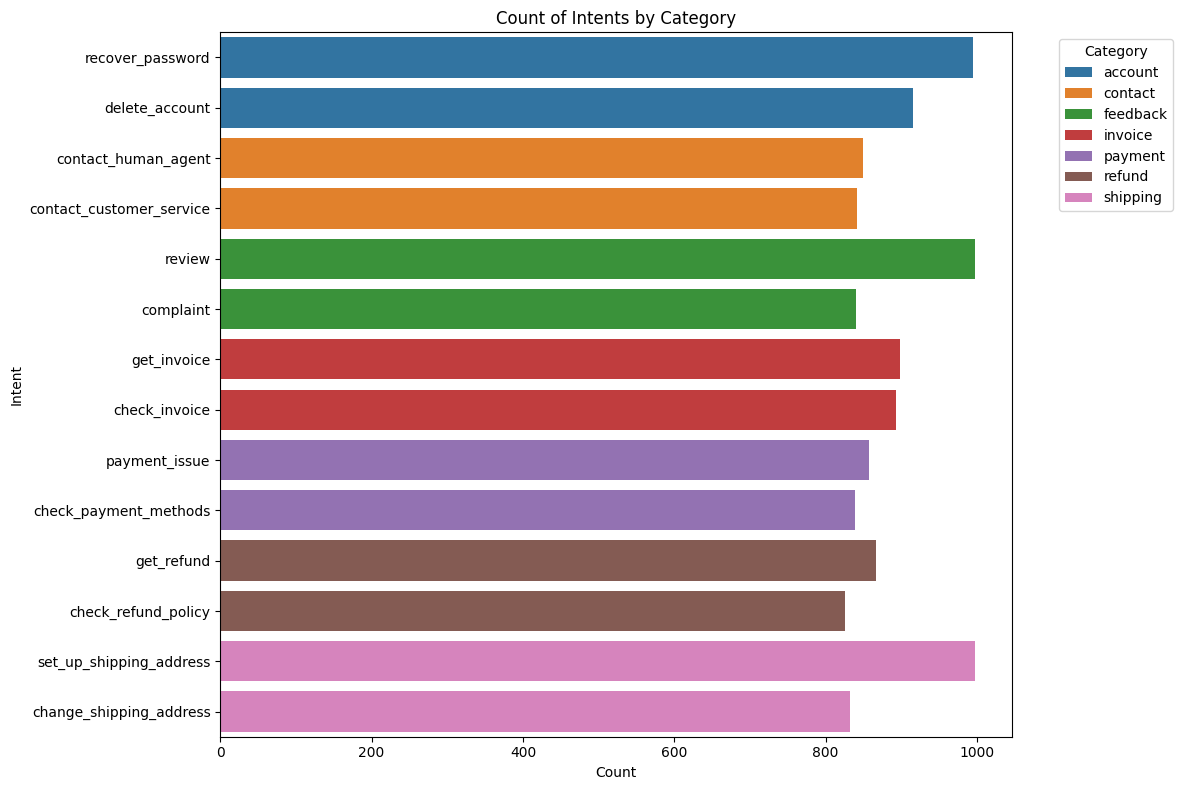

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Group by 'intent' and 'category' and count the occurrences
intent_category_counts = df.groupby(['intent', 'category']).size().reset_index(name='count')

# Sort by 'category' and then by 'count' in descending order
intent_category_counts = intent_category_counts.sort_values(by=['category', 'count'], ascending=[True, False])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='intent', hue='category', data=intent_category_counts, dodge=False)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Intent')
plt.title('Count of Intents by Category')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
